<a href="https://colab.research.google.com/github/Guimartinslimaoliveira/Python_Projects/blob/main/Previs%C3%B5es_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM


In [238]:
dataset = pd.read_csv('/content/drive/MyDrive/Datascience/BTC BRL.csv')

In [239]:
dataset.dtypes

,0
Data,object
Último,float64
Abertura,float64
Máxima,float64
Mínima,float64
Vol.,object
Var%,object


In [240]:
dataset.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,02.02.2025,571.531,593.432,598.108,570.000,"0,04K","-3,69%"
1,01.02.2025,593.432,599.969,602.357,591.617,"0,01K","-1,09%"
2,31.01.2025,599.969,613.039,619.048,595.300,"0,04K","-2,13%"
3,30.01.2025,613.039,603.135,626.849,601.636,"0,04K","1,64%"
4,29.01.2025,603.135,595.599,613.869,594.284,"0,04K","1,27%"


In [241]:
dataset['Data'] = pd.to_datetime(dataset['Data'], format = '%d.%m.%Y')

In [242]:
df_cripto_fec = dataset[['Data','Máxima']]
df_cripto_fec

,Data,Máxima
0,2025-02-02,598.108
1,2025-02-01,602.357
2,2025-01-31,619.048
3,2025-01-30,626.849
4,2025-01-29,613.869
...,...,...
1854,2020-01-05,30.200
1855,2020-01-04,29.980
1856,2020-01-03,30.350
1857,2020-01-02,30.000


In [243]:
df_cripto_fec = df_cripto_fec.set_index(pd.DatetimeIndex(df_cripto_fec['Data'].values))
df_cripto_fec

,Data,Máxima
2025-02-02,2025-02-02,598.108
2025-02-01,2025-02-01,602.357
2025-01-31,2025-01-31,619.048
2025-01-30,2025-01-30,626.849
2025-01-29,2025-01-29,613.869
...,...,...
2020-01-05,2020-01-05,30.200
2020-01-04,2020-01-04,29.980
2020-01-03,2020-01-03,30.350
2020-01-02,2020-01-02,30.000


In [244]:
df_cripto_fec.drop('Data', axis=1, inplace=True)
df_cripto_fec

,Máxima
2025-02-02,598.108
2025-02-01,602.357
2025-01-31,619.048
2025-01-30,626.849
2025-01-29,613.869
...,...
2020-01-05,30.200
2020-01-04,29.980
2020-01-03,30.350
2020-01-02,30.000


In [245]:
dataset.head(100)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-02-02,571.531,593.432,598.108,570.000,"0,04K","-3,69%"
1,2025-02-01,593.432,599.969,602.357,591.617,"0,01K","-1,09%"
2,2025-01-31,599.969,613.039,619.048,595.300,"0,04K","-2,13%"
3,2025-01-30,613.039,603.135,626.849,601.636,"0,04K","1,64%"
4,2025-01-29,603.135,595.599,613.869,594.284,"0,04K","1,27%"
...,...,...,...,...,...,...,...
95,2024-10-29,414.393,398.216,420.990,396.500,"0,14K","4,06%"
96,2024-10-28,398.216,391.085,399.856,388.373,"0,07K","1,82%"
97,2024-10-27,391.085,386.430,391.500,385.660,"0,02K","1,20%"
98,2024-10-26,386.430,383.125,387.142,381.500,"0,01K","0,86%"


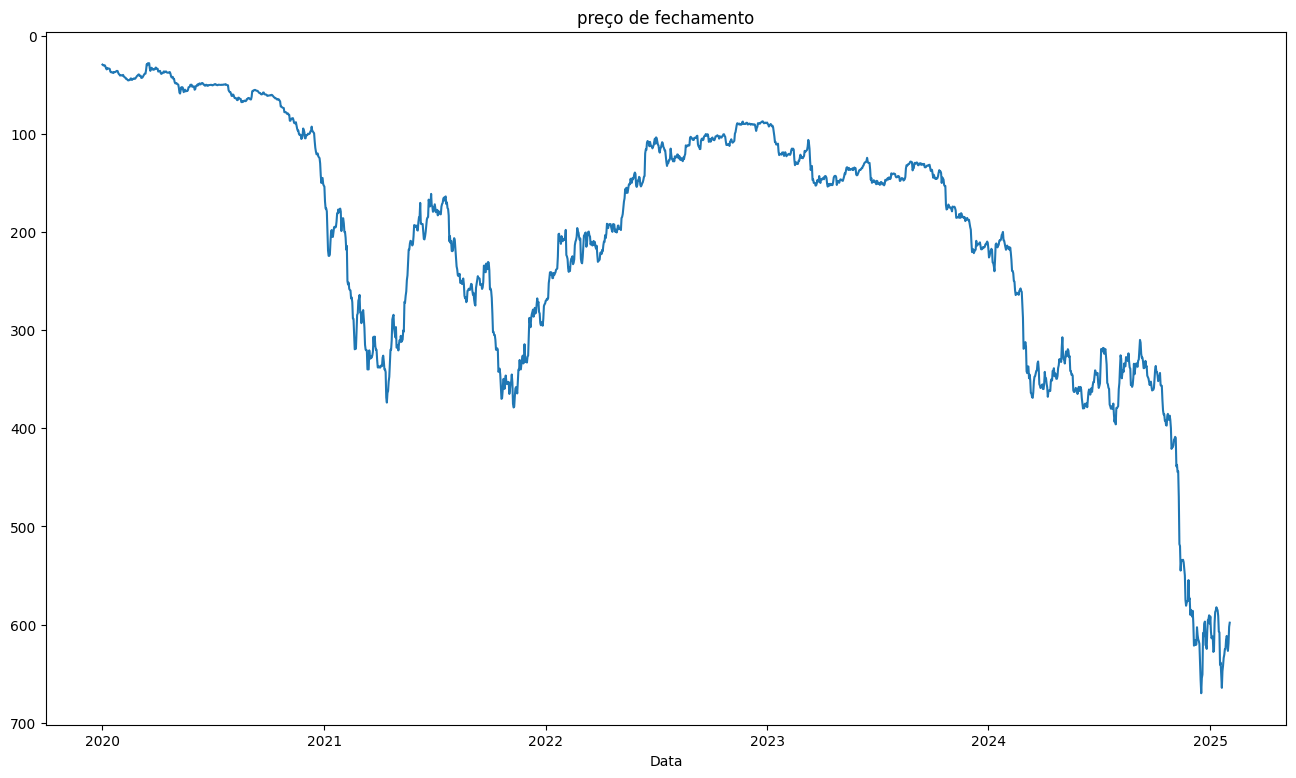

In [246]:

plt.figure(figsize=(16,9))
plt.title('preço de fechamento')
plt.plot(df_cripto_fec['Máxima'])
plt.xlabel('Data')

plt.gca().invert_yaxis()

plt.show()


In [247]:
qtd_linhas = len(df_cripto_fec)
qtd_linhas_treino = round(.70*qtd_linhas)
qtd_linhas_teste = qtd_linhas - qtd_linhas_treino

info =  (
    f"linhas_treino = 0 : {qtd_linhas_treino} //  "
    f"linhas_treino = {qtd_linhas_treino} :{qtd_linhas_treino + qtd_linhas_teste}"
)
info

'linhas_treino = 0 : 1301 //  linhas_treino = 1301 :1859'

In [248]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_cripto_fec)


In [249]:
train = df_scaled[:qtd_linhas_treino]
test = df_scaled[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste ]
print(len(train,), len(test))

1301 558


In [250]:
def create_df(df, steps = 1):
  dataX, dataY = [] , []
  for i in range(len(df)-steps-1):
    a = df[i:(i+steps),0]
    dataX.append(a)
    dataY.append(df[i+steps,0])
  return np.array(dataX), np.array(dataY)

In [251]:
#paramentro para mudança
steps = 15
#______________________________
x_train, y_train = create_df(train, steps)
x_test, y_test = create_df(train, steps)

In [252]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1285, 15)
(1285,)
(1285, 15)
(1285,)


In [253]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [254]:
model = Sequential()
model.add(LSTM(35, return_sequences = True, input_shape = (steps, 1)))
model.add(LSTM(35, return_sequences = True))
model.add(LSTM(35))


#parametro a ser acertado
model.add(Dropout(0.1))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [255]:
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 15, 35)              │           5,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 15, 35)              │           9,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 35)                  │           9,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 35)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,096 (98.03 KB)

 Trainable params: 25,096 (98.03 KB)

 Non-trainable params: 0 (0.00 B)

In [256]:
validation = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=10, verbose = 2)

Epoch 1/100
129/129 - 14s - 106ms/step - loss: 0.0694 - val_loss: 0.0226
Epoch 2/100
129/129 - 3s - 27ms/step - loss: 0.0268 - val_loss: 0.0265
Epoch 3/100
129/129 - 7s - 52ms/step - loss: 0.0304 - val_loss: 0.0179
Epoch 4/100
129/129 - 4s - 28ms/step - loss: 0.0250 - val_loss: 0.0137
Epoch 5/100
129/129 - 5s - 38ms/step - loss: 0.0192 - val_loss: 0.0186
Epoch 6/100
129/129 - 5s - 35ms/step - loss: 0.0177 - val_loss: 0.0126
Epoch 7/100
129/129 - 5s - 37ms/step - loss: 0.0220 - val_loss: 0.0198
Epoch 8/100
129/129 - 4s - 29ms/step - loss: 0.0174 - val_loss: 0.0099
Epoch 9/100
129/129 - 4s - 31ms/step - loss: 0.0158 - val_loss: 0.0126
Epoch 10/100
129/129 - 6s - 49ms/step - loss: 0.0127 - val_loss: 0.0085
Epoch 11/100
129/129 - 9s - 68ms/step - loss: 0.0130 - val_loss: 0.0136
Epoch 12/100
129/129 - 7s - 51ms/step - loss: 0.0156 - val_loss: 0.0104
Epoch 13/100
129/129 - 9s - 67ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 14/100
129/129 - 4s - 32ms/step - loss: 0.0112 - val_loss: 0.0089

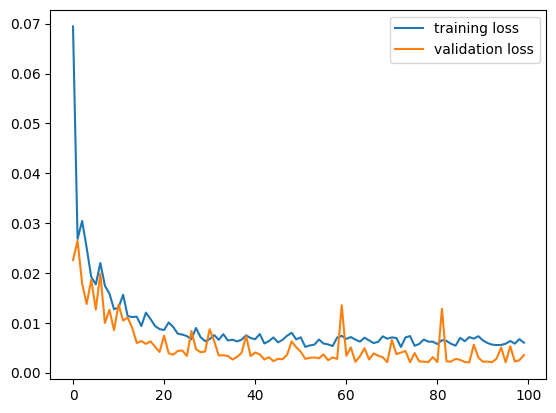

In [257]:
plt.plot(validation.history['loss'], label = 'training loss')
plt.plot(validation.history['val_loss'], label = 'validation loss')
plt.legend()

In [258]:


import numpy as np
from sklearn.metrics import mean_squared_error

# Predict on the test data
y_pred = model.predict(x_test)

# Inverse transform the scaled data to get actual values
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((len(y_test), df_cripto_fec.shape[1]-1))), axis=1))[:,0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1,1), np.zeros((len(y_pred), df_cripto_fec.shape[1]-1))), axis=1))[:,0]


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"RMSE: {rmse}")

# Calculate accuracy (example using a threshold - adjust as needed)
threshold = 10 # Define a threshold for considering a prediction "accurate"
accuracy = np.sum(np.abs(y_test_actual-y_pred_actual) < threshold)/len(y_test_actual)
print(f"Accuracy (threshold={threshold}): {accuracy*100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
RMSE: 7.968311919396422
Accuracy (threshold=10): 84.28%


In [259]:
prev  = model.predict(x_test)
prev = scaler.inverse_transform(prev)
prev

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[653.7311 ],
       [639.1281 ],
       [644.80225],
       ...,
       [166.31377],
       [170.26572],
       [170.96042]], dtype=float32)

In [260]:
leng_test = len(test)
leng_test

558

In [261]:
days_input_steps = leng_test - steps
days_input_steps

543

In [262]:
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps

array([[-1.24731641, -1.25253164, -1.27266241, -1.27510612, -1.27525512,
        -1.27585115, -1.28009783, -1.26907135, -1.27600016, -1.28978325,
        -1.29946868, -1.30110775, -1.29835113, -1.30095874, -1.30543639]])

In [263]:
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[-1.2473164092653983,
 -1.2525316359210883,
 -1.2726624108120523,
 -1.2751061170164328,
 -1.2752551234923097,
 -1.2758511493958171,
 -1.2800978339583076,
 -1.26907135474342,
 -1.276000155871694,
 -1.2897832548903037,
 -1.2994686758222997,
 -1.3011077470569452,
 -1.2983511272532233,
 -1.3009587405810683,
 -1.3054363851811681]

In [264]:
pred_output=[]
i=0
n_future =10
while(i<n_future):

  if(len(list_output_steps) > steps):
    input_steps = np.array(list_output_steps[1:])
    print("{} dia. valores de entrada ->{}".format(i,input_steps))
    input_steps = input_steps.reshape(1,-1)
    input_steps = input_steps.reshape((1, steps, 1))
    #print(input_steps)
    pred =  model.predict(input_steps, verbose = 0)
    print('{} dia. Valor Previsto - > {}'.format(i,pred))
    list_output_steps.extend(pred[0].tolist())
    list_output_steps = list_output_steps[1:]
    #print(list_output_steps)
    pred_output.extend(pred.tolist())
    i=i+1
  else:
    input_steps = input_steps.reshape((1, steps, 1))
    pred = model.predict(input_steps, verbose = 0)
    print(pred[0])
    list_output_steps.extend(pred[0].tolist())
    print(len(list_output_steps))
    pred_output.extend(pred.tolist())
    i = i+1

print(pred_output)

[-1.3233061]
16
1 dia. valores de entrada ->[-1.25253164 -1.27266241 -1.27510612 -1.27525512 -1.27585115 -1.28009783
 -1.26907135 -1.27600016 -1.28978325 -1.29946868 -1.30110775 -1.29835113
 -1.30095874 -1.30543639 -1.32330608]
1 dia. Valor Previsto - > [[-1.3370962]]
2 dia. valores de entrada ->[-1.27266241 -1.27510612 -1.27525512 -1.27585115 -1.28009783 -1.26907135
 -1.27600016 -1.28978325 -1.29946868 -1.30110775 -1.29835113 -1.30095874
 -1.30543639 -1.32330608 -1.33709621]
2 dia. Valor Previsto - > [[-1.3500435]]
3 dia. valores de entrada ->[-1.27510612 -1.27525512 -1.27585115 -1.28009783 -1.26907135 -1.27600016
 -1.28978325 -1.29946868 -1.30110775 -1.29835113 -1.30095874 -1.30543639
 -1.32330608 -1.33709621 -1.35004354]
3 dia. Valor Previsto - > [[-1.3627093]]
4 dia. valores de entrada ->[-1.27525512 -1.27585115 -1.28009783 -1.26907135 -1.27600016 -1.28978325
 -1.29946868 -1.30110775 -1.29835113 -1.30095874 -1.30543639 -1.32330608
 -1.33709621 -1.35004354 -1.36270928]
4 dia. Valor 

In [265]:
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev

[27.000486996739824,
 25.149543199286285,
 23.411723300933687,
 21.71169670522272,
 20.084120606701163,
 18.534083180745824,
 17.066544598321514,
 15.67977679986629,
 14.369363633166358,
 13.131880980200776]

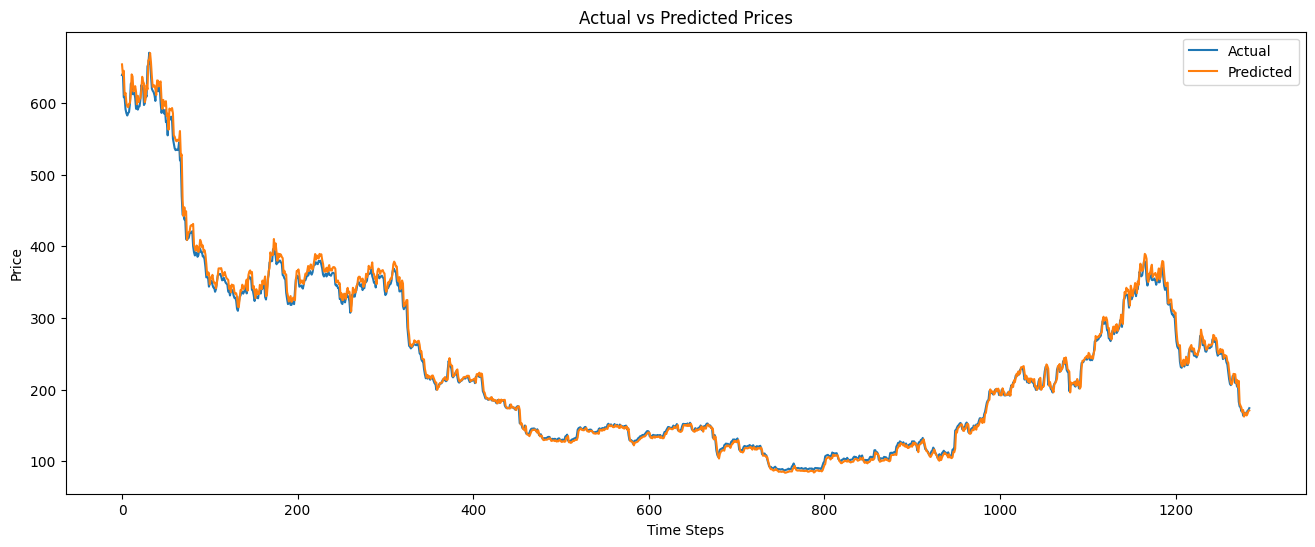

In [266]:
# prompt: validação do modelo em grafico

import matplotlib.pyplot as plt
# Plot the predicted vs actual values
plt.figure(figsize=(16, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


In [270]:

dados_hoje = pd.DataFrame([[561832]], columns=['Máxima'])

dados_hoje_normalizados = scaler.transform(dados_hoje)

dados_hoje_normalizados = dados_hoje_normalizados.reshape((dados_hoje_normalizados.shape[0], dados_hoje_normalizados.shape[1], 1))

previsoes = model.predict(dados_hoje_normalizados)

previsoes_reais = scaler.inverse_transform(previsoes)

print(previsoes_reais)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[723.9544]]


In [296]:
dados_hoje = np.array([[561832]])


dados_hoje_normalizados = scaler.transform(dados_hoje)


dados_hoje_normalizados = dados_hoje_normalizados.reshape((dados_hoje_normalizados.shape[0], dados_hoje_normalizados.shape[1], 1))


previsoes = []
dias = 5

for i in range(dias):

    pred = model.predict(dados_hoje_normalizados)


    pred_real = scaler.inverse_transform(pred)


    previsoes.append(pred_real[0][0])


    dados_hoje_normalizados = pred.reshape((pred.shape[0], pred.shape[1], 1))


print(previsoes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[723.9544, 598.7081, 556.9023, 538.2912, 529.00085]


In [298]:
last_date = df_cripto_fec.index[-1]
date_range = pd.date_range(start=last_date + pd.DateOffset(1), periods=len(previsoes))


# Create a DataFrame for better visualization and manipulation
previsoes_df = pd.DataFrame({'Data': date_range, 'Previsao': previsoes})
previsoes_df = previsoes_df.set_index('Data')


# Print the predictions and dates
previsoes_df


,Previsao
Data,
2020-01-02,723.954407
2020-01-03,598.708130
2020-01-04,556.902283
2020-01-05,538.291199
2020-01-06,529.000854


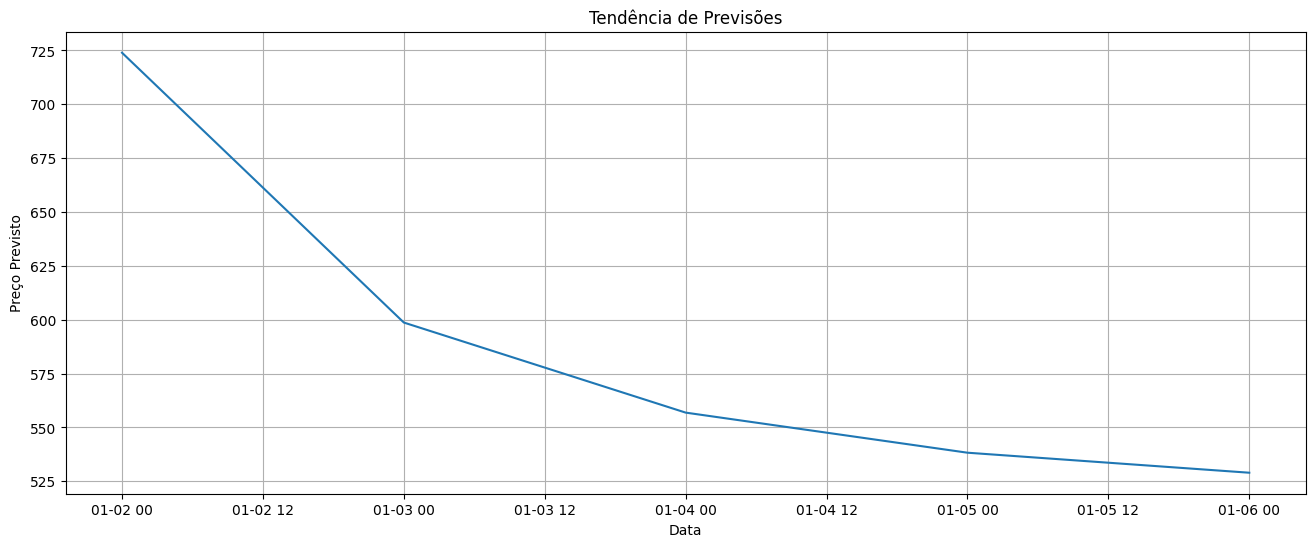

In [299]:

plt.figure(figsize=(16, 6))
plt.plot(previsoes_df['Previsao'])
plt.xlabel('Data')
plt.ylabel('Preço Previsto')
plt.title('Tendência de Previsões')
plt.grid(True)
plt.show()
